# Churn Prediction in Telecom Industry using Logistic Regression

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

## Reading and Understanding the Data and Merging Data

### Data Inspection

In [2]:
telecom = pd.read_csv('dataset.csv')

In [3]:
# Let's see the head of our master dataset
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning

In [8]:
# Checking Null values
telecom.isnull().sum()*100/telecom.shape[0]
# There are no NULL values in the dataset, hence it is clean.

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

#### Total Charges

In [9]:
telecom['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [10]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [11]:
# Total Charges will be related to Monthly Charges.
# We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [12]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [13]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [14]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

## Exploratory Data Analytics

### Univariate Analysis

#### Churn (Target Variable)

In [15]:
telecom.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

Text(0.5, 0, 'Count')

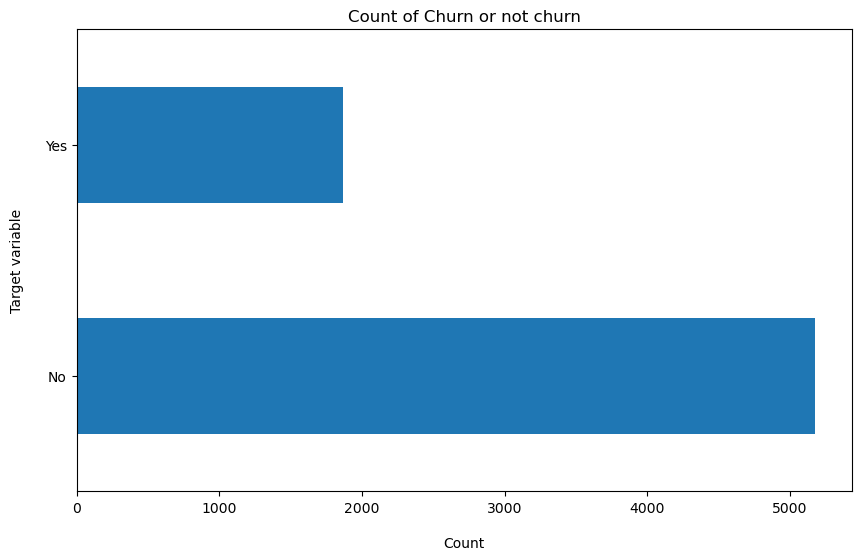

In [16]:
telecom['Churn'].value_counts().plot(kind='barh',figsize=(10,6))
plt.title("Count of Churn or not churn")
plt.ylabel("Target variable",labelpad=15)
plt.xlabel("Count", labelpad=15)

In [17]:
# We have a data with 27% churn rate.

#### Tenure

In [18]:
# The time for which a customer has been using the service.

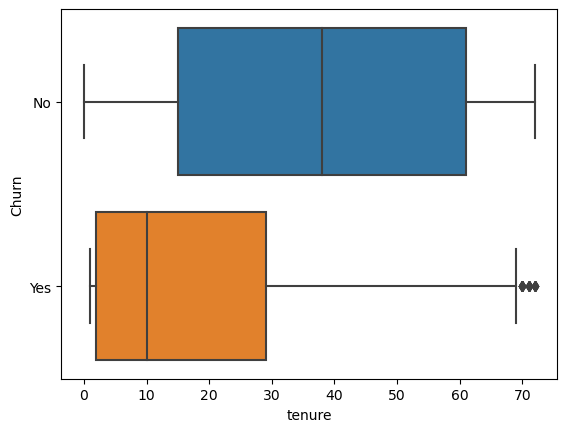

In [19]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

In [20]:
# Customer with more tenure tends to churn less.

#### Phone Service

In [21]:
# Whether a customer has a landline phone service along with the internet service.

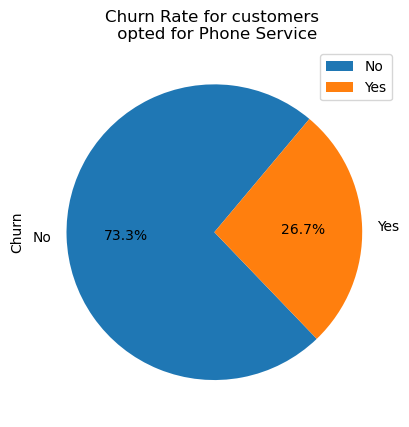

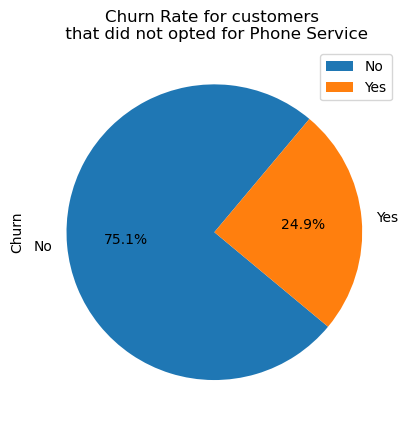

In [22]:
pie_PhoneService_Yes = pd.DataFrame(telecom[telecom['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom[telecom['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 

In [23]:
# Opting for phone service does not have a significant impact on churn rate.

#### Contract

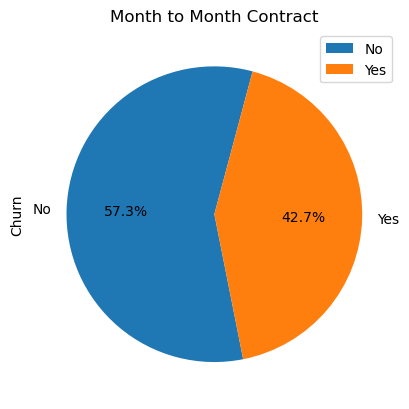

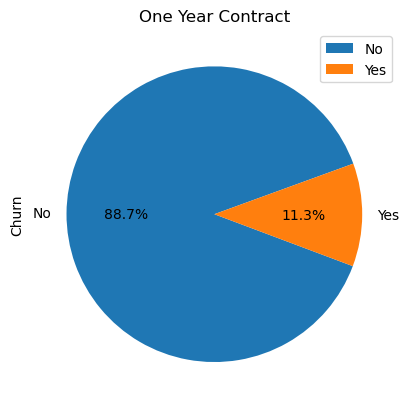

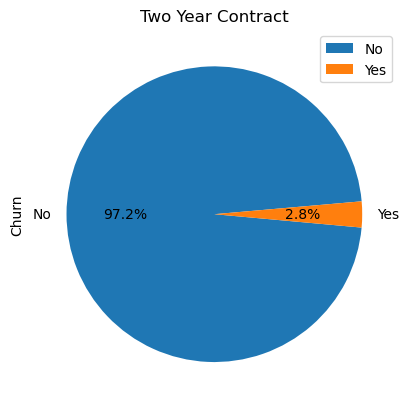

In [24]:
pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

In [25]:
# Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

#### Paperless Billing

<Figure size 1500x500 with 0 Axes>

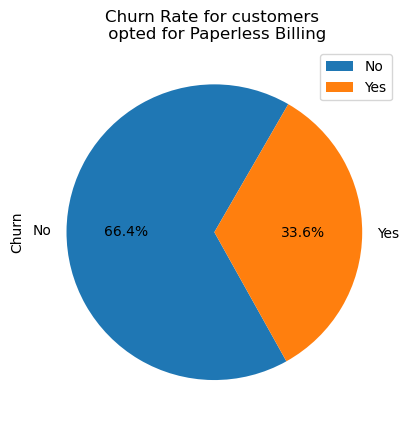

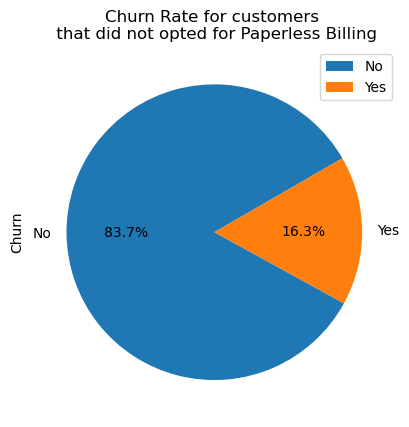

In [26]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

In [27]:
# Churn Rate is higher for the customers who opted for paperless billing.

#### Payment Method

In [28]:
telecom.PaymentMethod.describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

<Figure size 1500x1000 with 0 Axes>

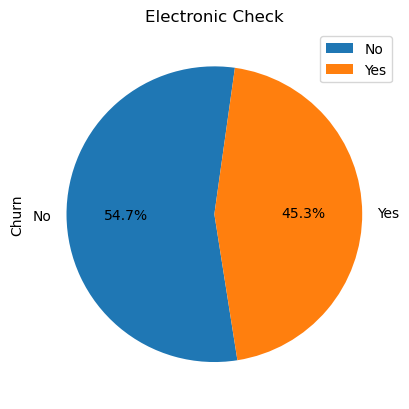

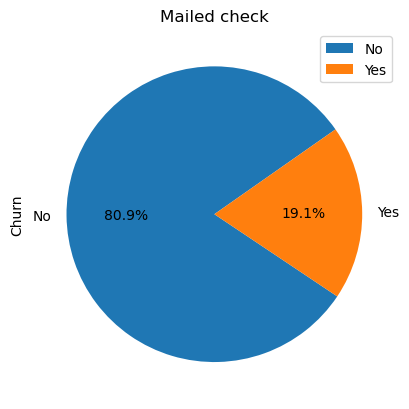

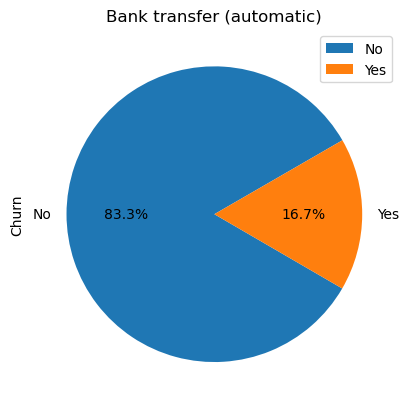

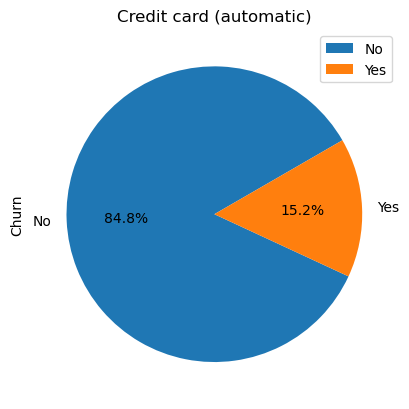

In [29]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

In [30]:
# Customers with Electronic Check tends to churn more than other payment methods.

#### Monthly Charges

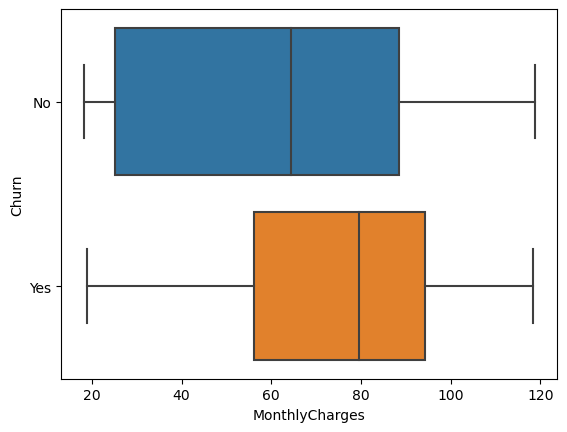

In [31]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

In [32]:
# Median monthly charges are higher for customers who have churned.

#### TotalCharges

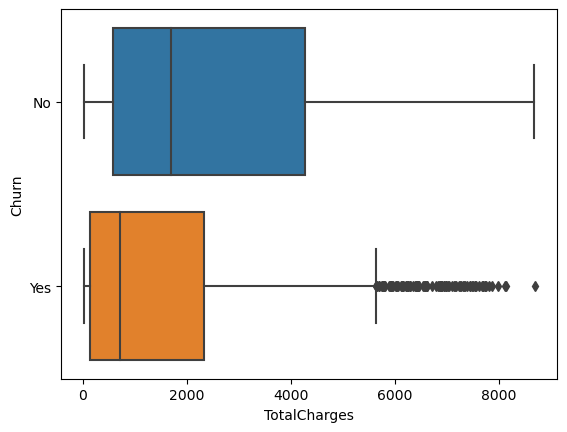

In [33]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom)
plt.show()

In [34]:
# Median Total charges are low for customers who have churned.

#### Gender

<Figure size 1500x500 with 0 Axes>

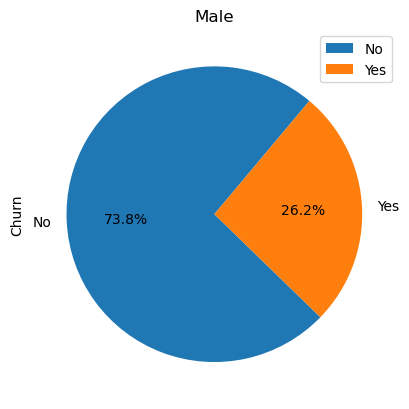

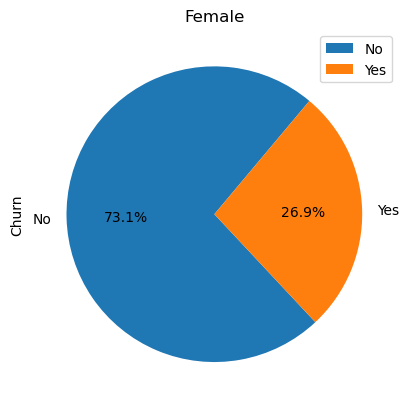

In [35]:
plt.figure(figsize=(15,5))
pie_Gender_M = pd.DataFrame(telecom[telecom['gender'] == "Male"]['Churn'].value_counts())
pie_Gender_M.plot.pie(subplots = True, labels = pie_Gender_M.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Male')
plt.gca().set_aspect('equal')

pie_Gender_F = pd.DataFrame(telecom[telecom['gender'] == "Female"]['Churn'].value_counts())
pie_Gender_F.plot.pie(subplots = True,  labels = pie_Gender_F.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Female')

plt.gca().set_aspect('equal')
plt.show() 

In [36]:
# There is no effect of Gender on Churn.

#### Senior Citizen

<Figure size 1500x500 with 0 Axes>

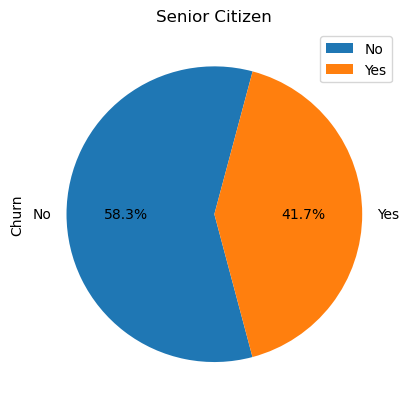

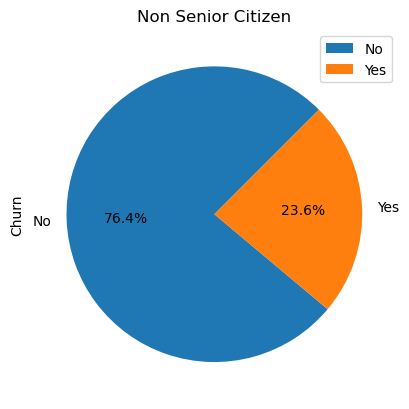

In [37]:
plt.figure(figsize=(15,5))
pie_SeniorCitizen_Y = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 1]['Churn'].value_counts())
pie_SeniorCitizen_Y.plot.pie(subplots = True, labels = pie_SeniorCitizen_Y.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Senior Citizen')
plt.gca().set_aspect('equal')

pie_SeniorCitizen_N = pd.DataFrame(telecom[telecom['SeniorCitizen'] == 0]['Churn'].value_counts())
pie_SeniorCitizen_N.plot.pie(subplots = True, labels = pie_SeniorCitizen_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Non Senior Citizen')

plt.gca().set_aspect('equal')
plt.show() 

In [38]:
# Senior Citizens tends to churn more.

#### Partner

<Figure size 1500x500 with 0 Axes>

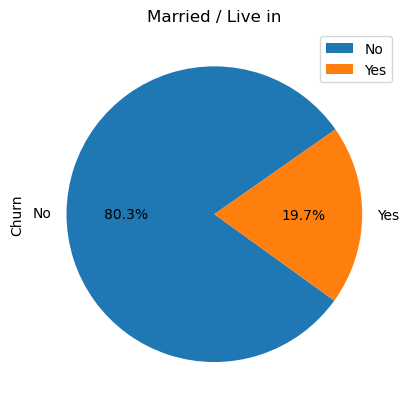

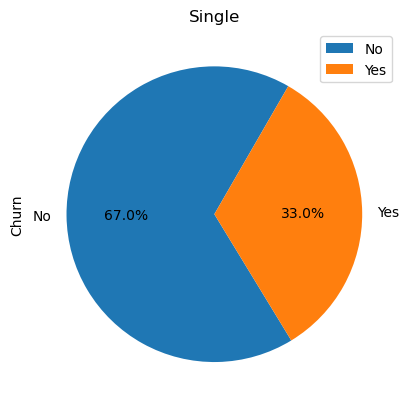

In [39]:
plt.figure(figsize=(15,5))
pie_Partner_Y = pd.DataFrame(telecom[telecom['Partner'] == 'Yes']['Churn'].value_counts())
pie_Partner_Y.plot.pie(subplots = True,  labels = pie_Partner_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Married / Live in')
plt.gca().set_aspect('equal')

pie_Partner_N = pd.DataFrame(telecom[telecom['Partner'] == 'No']['Churn'].value_counts())
pie_Partner_N.plot.pie(subplots = True,  labels = pie_Partner_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Single')

plt.gca().set_aspect('equal')
plt.show() 

#### Dependents

<Figure size 1500x500 with 0 Axes>

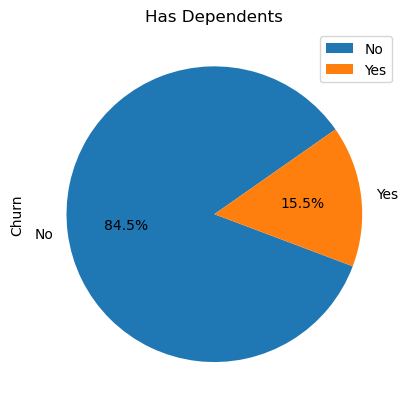

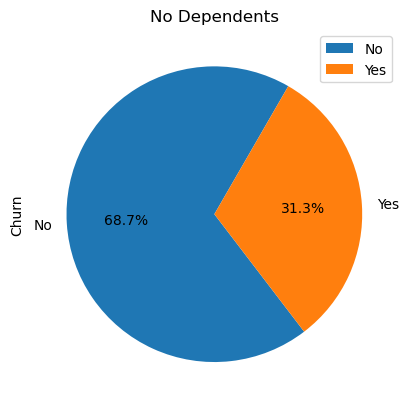

In [40]:
plt.figure(figsize=(15,5))
pie_Dependents_Y = pd.DataFrame(telecom[telecom['Dependents'] == 'Yes']['Churn'].value_counts())
pie_Dependents_Y.plot.pie(subplots = True,  labels = pie_Dependents_Y.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Has Dependents')
plt.gca().set_aspect('equal')

pie_Dependents_N = pd.DataFrame(telecom[telecom['Dependents'] == 'No']['Churn'].value_counts())
pie_Dependents_N.plot.pie(subplots = True,  labels = pie_Dependents_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('No Dependents')

plt.gca().set_aspect('equal')
plt.show() 

In [41]:
# Customers with no dependents tends to churn more.

#### Multiple Lines

In [42]:
# Whether a customer has multiple lines of internet connectivity.

<Figure size 1500x500 with 0 Axes>

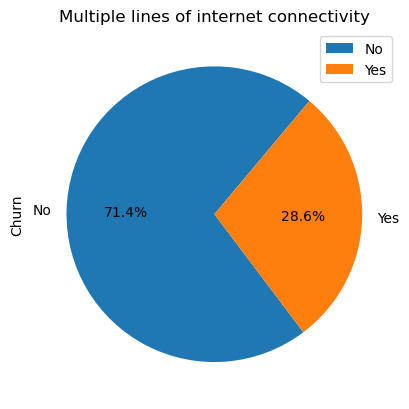

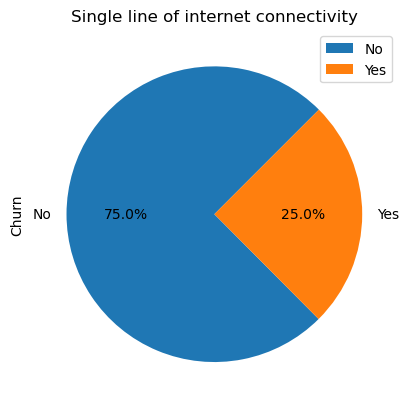

In [43]:
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom[telecom['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(telecom[telecom['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

In [44]:
# Multiple lines of internet connectivity doesn't effect churn that much.

#### Internet Service

<Figure size 1500x500 with 0 Axes>

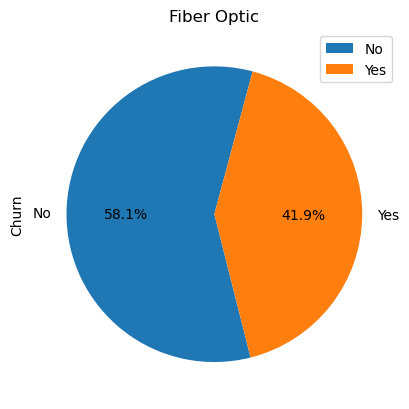

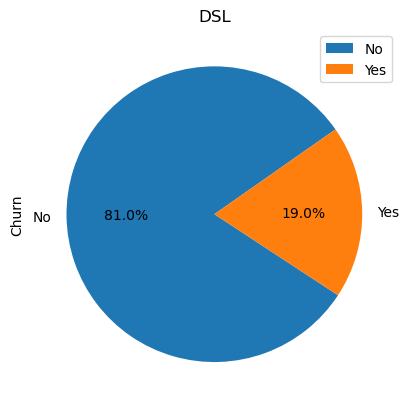

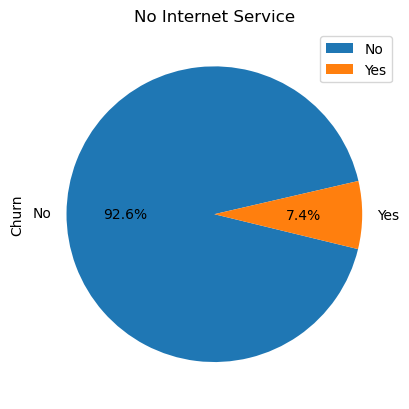

In [45]:
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom[telecom['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom[telecom['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom[telecom['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

In [46]:
# Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#### Online Security

<Figure size 1500x500 with 0 Axes>

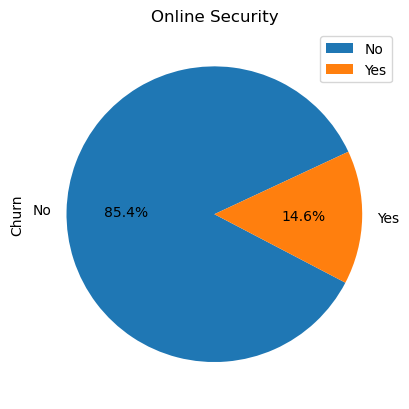

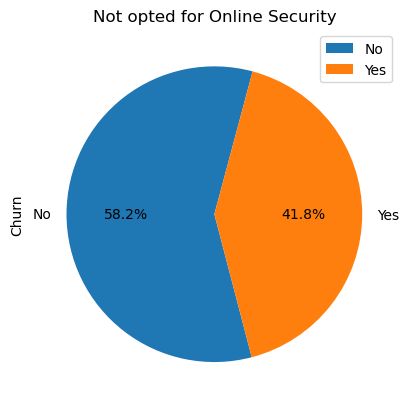

In [47]:
plt.figure(figsize=(15,5))
pie_OnlineSecurity_Y = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'Yes']['Churn'].value_counts())
pie_OnlineSecurity_Y.plot.pie(subplots = True,  labels = pie_OnlineSecurity_Y.index.values, autopct='%1.1f%%', startangle= 25)
plt.title('Online Security')
plt.gca().set_aspect('equal')

pie_OnlineSecurity_N = pd.DataFrame(telecom[telecom['OnlineSecurity'] == 'No']['Churn'].value_counts())
pie_OnlineSecurity_N.plot.pie(subplots = True, labels = pie_OnlineSecurity_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Security')
plt.gca().set_aspect('equal')
plt.show() 

In [48]:
# Customers opted for Online Security churn less than who have not opted.

#### Online Backup

<Figure size 1500x500 with 0 Axes>

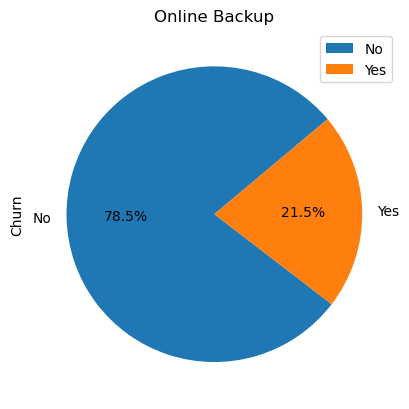

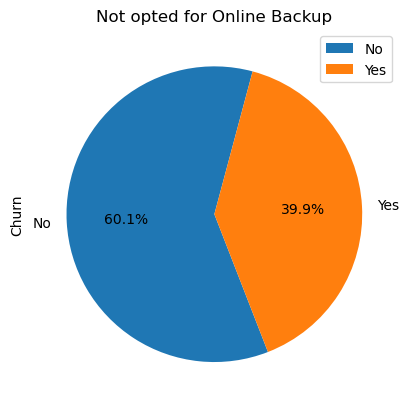

In [49]:
plt.figure(figsize=(15,5))
pie_OnlineBackup_Y = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'Yes']['Churn'].value_counts())
pie_OnlineBackup_Y.plot.pie(subplots = True,  labels = pie_OnlineBackup_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_OnlineBackup_N = pd.DataFrame(telecom[telecom['OnlineBackup'] == 'No']['Churn'].value_counts())
pie_OnlineBackup_N.plot.pie(subplots = True, labels = pie_OnlineBackup_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')

plt.show() 

In [50]:
# Customers opted for Online Backup churn less than who have not opted.

#### Device Protection

<Figure size 1500x500 with 0 Axes>

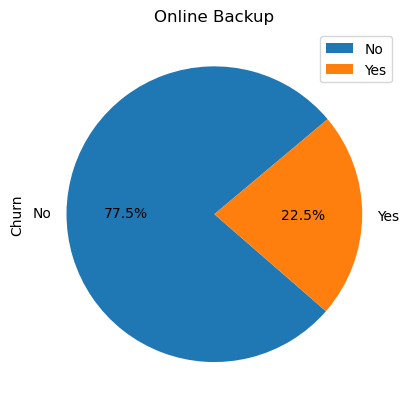

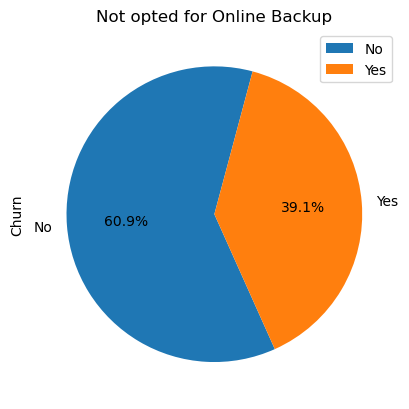

In [51]:
plt.figure(figsize=(15,5))

pie_DeviceProtection_Y = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'Yes']['Churn'].value_counts())
pie_DeviceProtection_Y.plot.pie(subplots = True, labels = pie_DeviceProtection_Y.index.values, autopct='%1.1f%%', startangle= 40)
plt.title('Online Backup')
plt.gca().set_aspect('equal')

pie_DeviceProtection_N = pd.DataFrame(telecom[telecom['DeviceProtection'] == 'No']['Churn'].value_counts())
pie_DeviceProtection_N.plot.pie(subplots = True, labels = pie_DeviceProtection_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Online Backup')
plt.gca().set_aspect('equal')
plt.show() 

In [52]:
# Customers opted for Device Potection churn less than who have not opted.

#### Tech Support

<Figure size 1500x500 with 0 Axes>

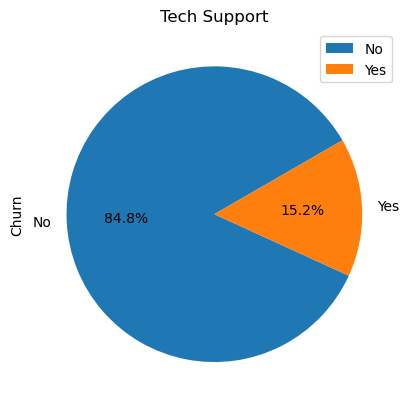

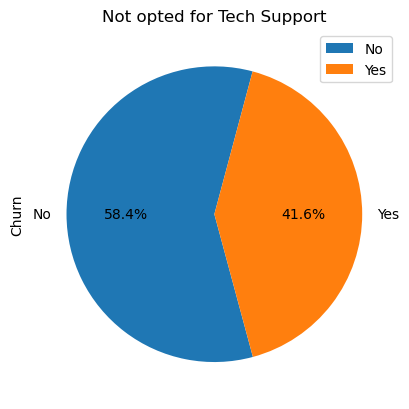

In [53]:
plt.figure(figsize=(15,5))
pie_TechSupport_Y = pd.DataFrame(telecom[telecom['TechSupport'] == 'Yes']['Churn'].value_counts())
pie_TechSupport_Y.plot.pie(subplots = True,labels = pie_TechSupport_Y.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Tech Support')
plt.gca().set_aspect('equal')

pie_TechSupport_N = pd.DataFrame(telecom[telecom['TechSupport'] == 'No']['Churn'].value_counts())
pie_TechSupport_N.plot.pie(subplots = True, labels = pie_TechSupport_N.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Not opted for Tech Support')

plt.gca().set_aspect('equal')
plt.show() 

In [54]:
# Customers opted for Tech Support churn less than who have not opted.

#### Streaming TV

<Figure size 1500x500 with 0 Axes>

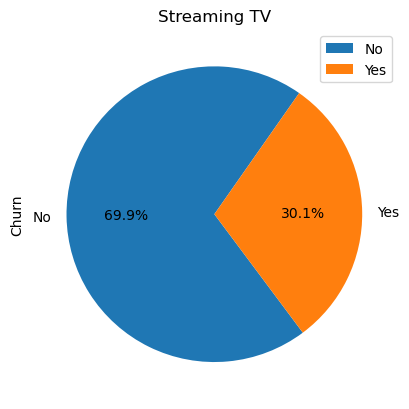

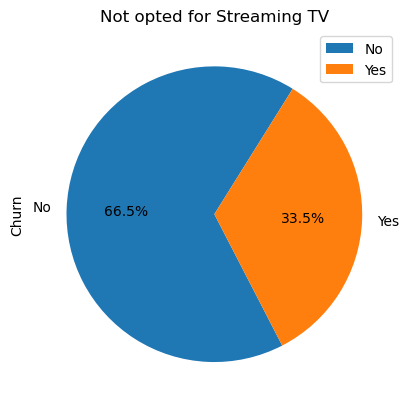

In [55]:
plt.figure(figsize=(15,5))
pie_StreamingTV_Y = pd.DataFrame(telecom[telecom['StreamingTV'] == 'Yes']['Churn'].value_counts())
pie_StreamingTV_Y.plot.pie(subplots = True, labels = pie_StreamingTV_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming TV')
plt.gca().set_aspect('equal')

pie_StreamingTV_N = pd.DataFrame(telecom[telecom['StreamingTV'] == 'No']['Churn'].value_counts())
pie_StreamingTV_N.plot.pie(subplots = True,labels = pie_StreamingTV_N.index.values, autopct='%1.1f%%', startangle= 58)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show() 

In [56]:
# Streaming TV doesn't make such impact on churning.

#### Streaming Movies

<Figure size 1500x500 with 0 Axes>

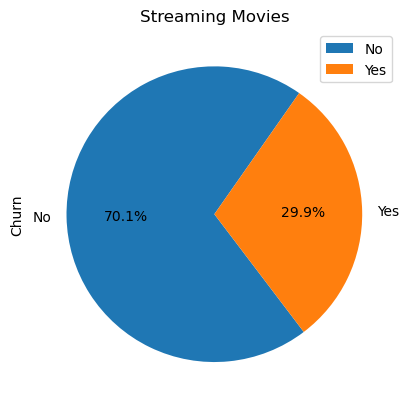

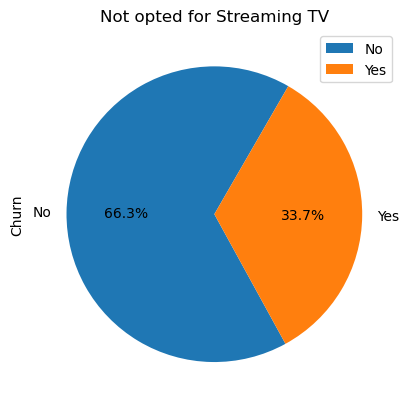

In [57]:
plt.figure(figsize=(15,5))
pie_StreamingMovies_Y = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'Yes']['Churn'].value_counts())
pie_StreamingMovies_Y.plot.pie(subplots = True, labels = pie_StreamingMovies_Y.index.values, autopct='%1.1f%%', startangle= 55)
plt.title('Streaming Movies')
plt.gca().set_aspect('equal')

pie_StreamingMovies_N = pd.DataFrame(telecom[telecom['StreamingMovies'] == 'No']['Churn'].value_counts())
pie_StreamingMovies_N.plot.pie(subplots = True, labels = pie_StreamingMovies_N.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Not opted for Streaming TV')
plt.gca().set_aspect('equal')

plt.show()

In [58]:
# Streaming Movies doesn't make such impact on churning.

## Model Building

### Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [59]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [60]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [61]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [62]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [63]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [64]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


#### Dropping the repeated variables

In [65]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [66]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [67]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [68]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [69]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [70]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [71]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [72]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [75]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [79]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

### Step 6: Looking at Correlations

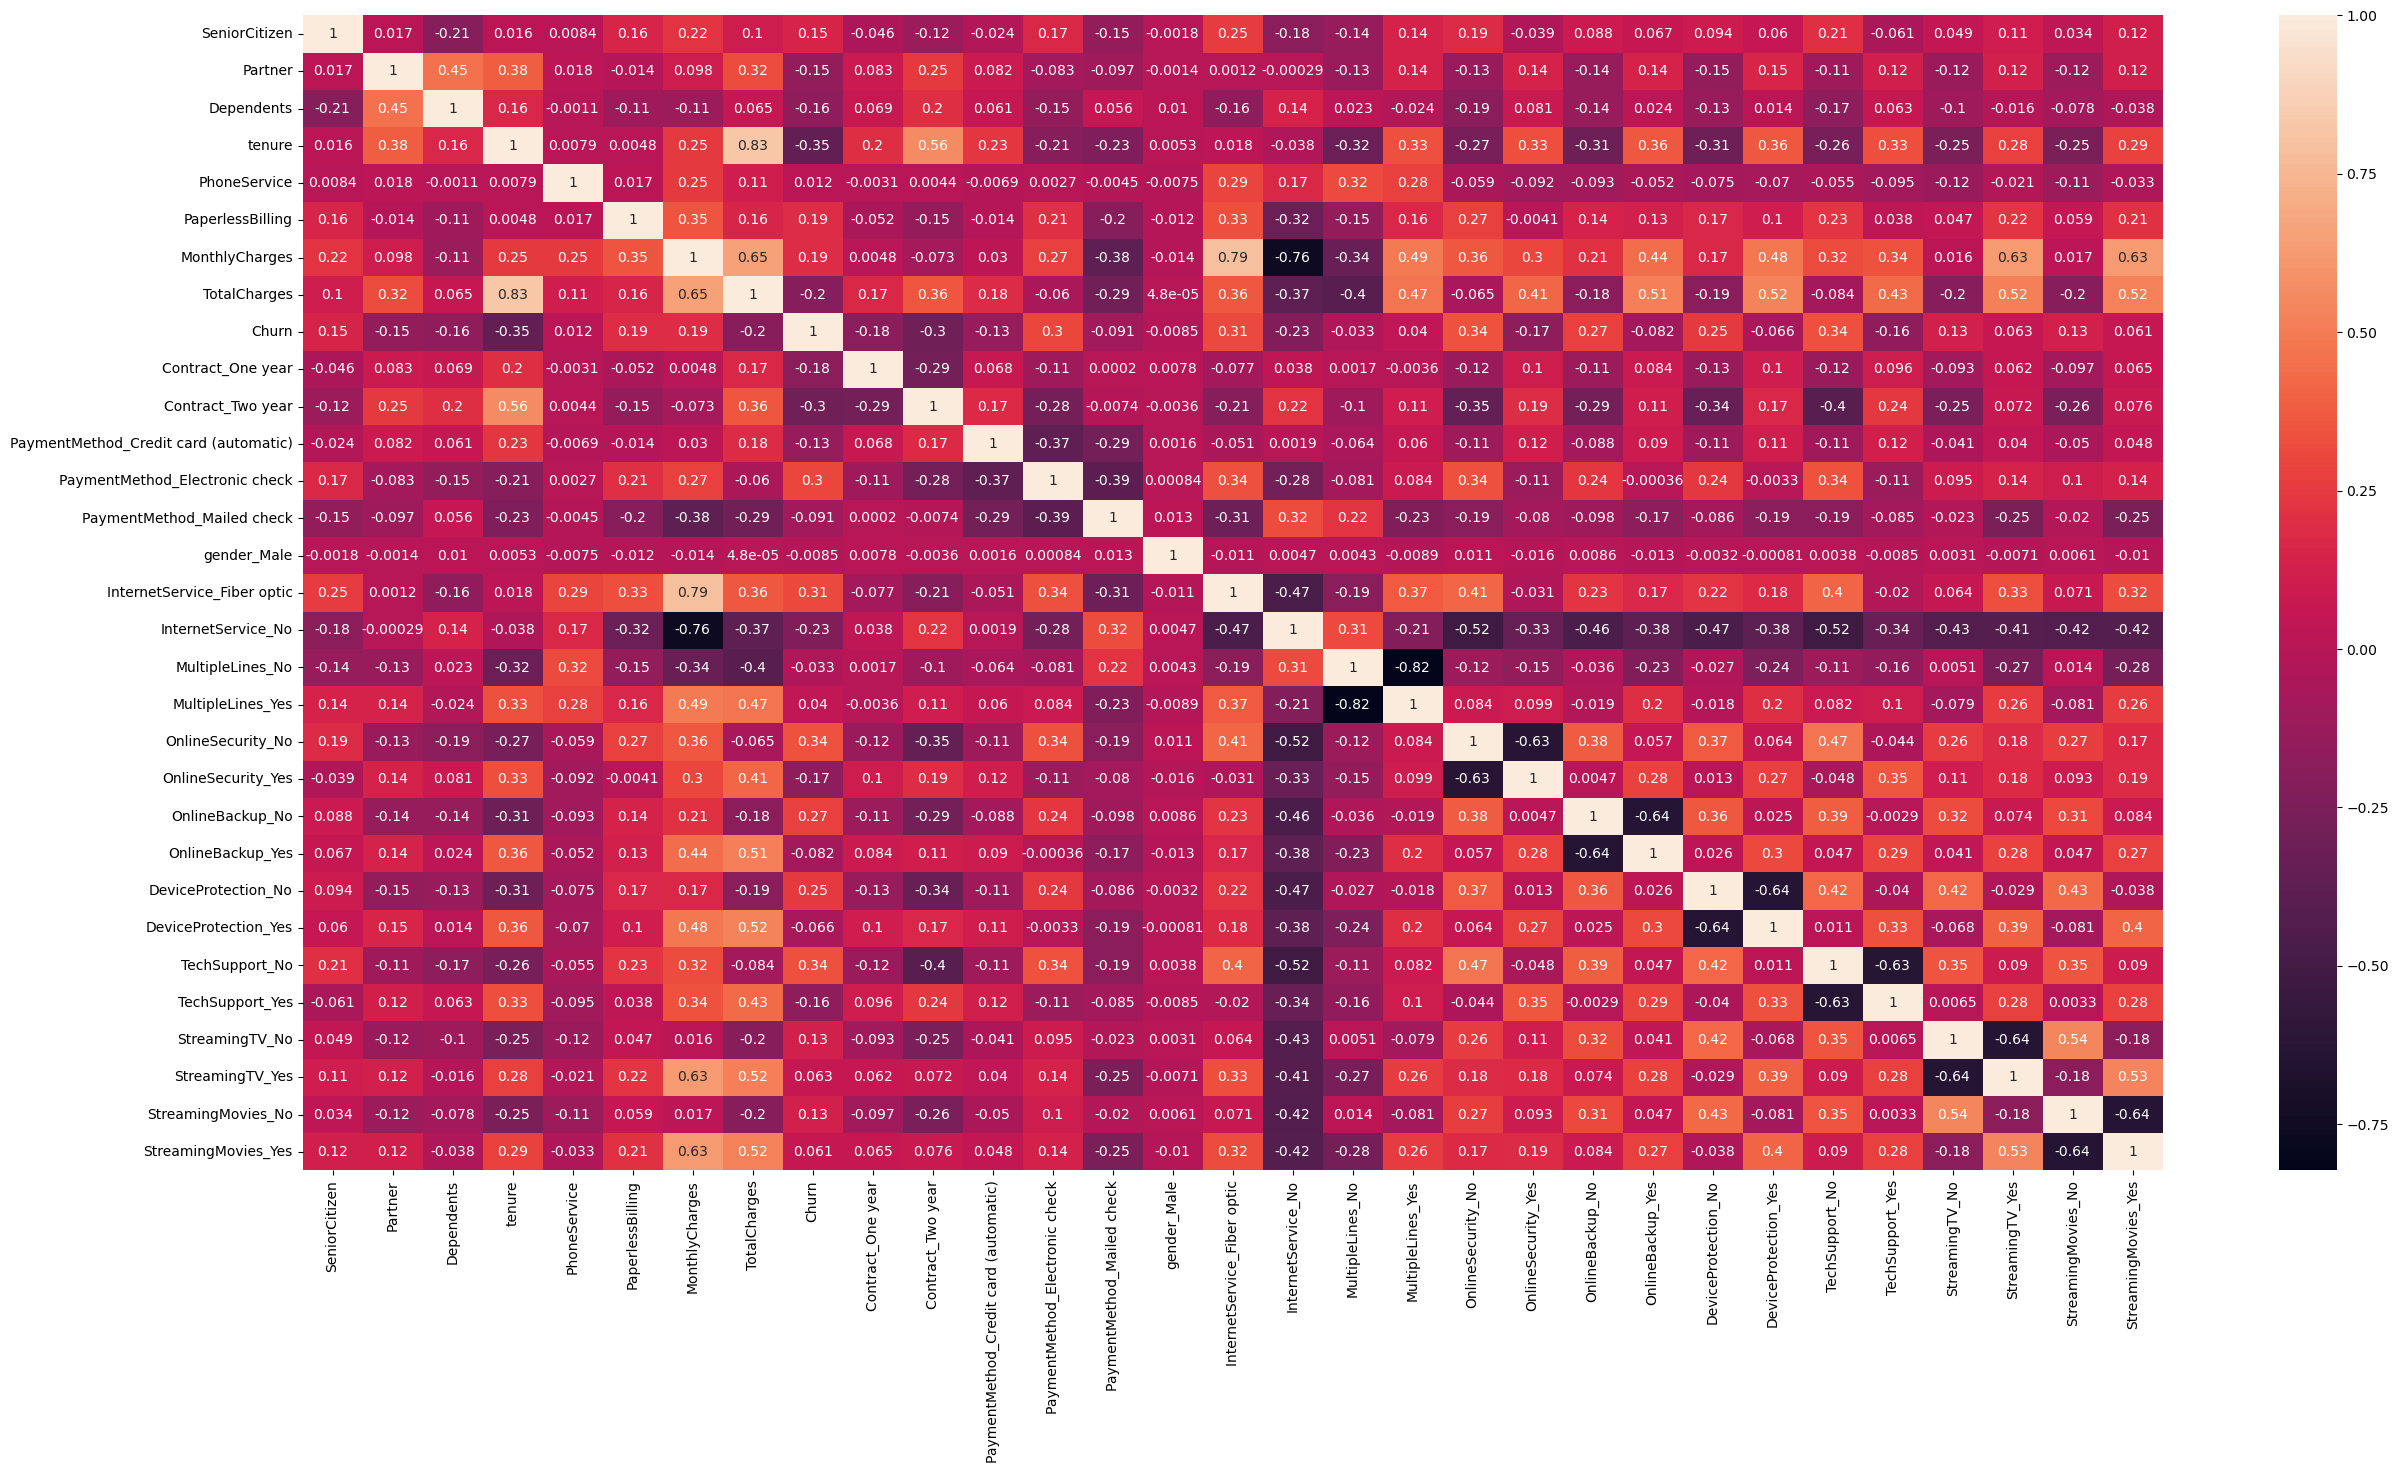

In [80]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [81]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

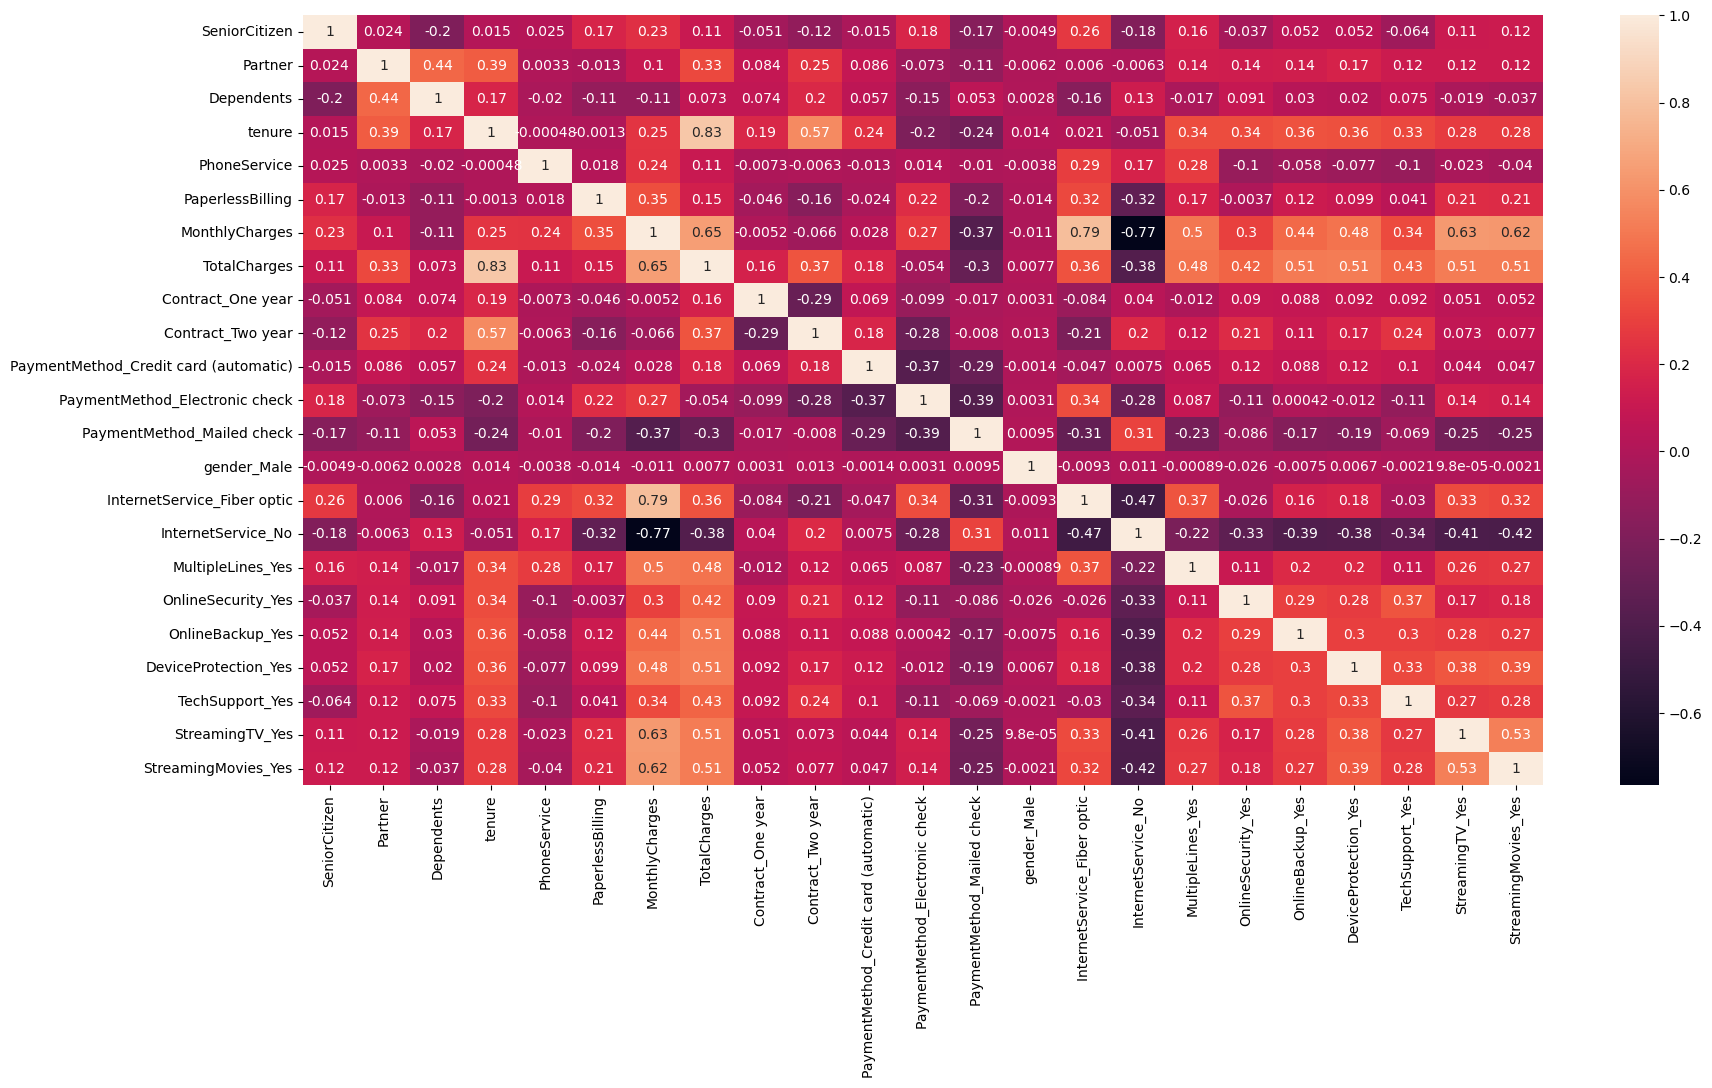

In [82]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [83]:
import statsmodels.api as sm

In [84]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 22 Jul 2023   Deviance:                       4009.4
Time:                        00:04:43   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [86]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [87]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False,  True,  True])

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 11),
 ('Dependents', False, 10),
 ('tenure', True, 1),
 ('PhoneService', False, 7),
 ('PaperlessBilling', False, 4),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', False, 8),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 12),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 6),
 ('OnlineBackup_Yes', False, 9),
 ('DeviceProtection_Yes', False, 13),
 ('TechSupport_Yes', False, 5),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [89]:
col = X_train.columns[rfe.support_]

In [90]:
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Sat, 22 Jul 2023   Deviance:                       4062.5
Time:                        00:04:44   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4327      0.158    -15.402      0.000      -2.742      -2.123
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
tenure                         -1.4711      0.184     -8.010      0.000      -1.831      -1.111
MonthlyCharges                 -1.1549      0.184     -6.279      0.000      -1.515      -0.794
TotalCharges                    0.6548      0.195      3.359      0.001       0.273       1.037
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
===============================================================================================
"""

In [92]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.141849
5790    0.234950
6498    0.520938
880     0.498011
2784    0.651654
3874    0.319438
5387    0.492438
6623    0.776976
4465    0.179572
5364    0.547303
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14184908, 0.23495033, 0.52093813, 0.49801078, 0.65165382,
       0.31943794, 0.49243768, 0.77697601, 0.17957212, 0.54730313])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [94]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.141849,879
1,0,0.234950,5790
2,1,0.520938,6498
3,1,0.498011,880
4,1,0.651654,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.141849,879,0
1,0,0.234950,5790,0
2,1,0.520938,6498,1
3,1,0.498011,880,0
4,1,0.651654,2784,1


In [96]:
from sklearn import metrics

In [97]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3257  378]
 [ 593  694]]


In [98]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [99]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8027224705404307


#### Checking VIFs

In [100]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,12.77
3,TotalCharges,10.09
1,tenure,6.77
7,InternetService_No,4.88
6,InternetService_Fiber optic,4.42
5,Contract_Two year,2.63
9,StreamingTV_Yes,2.61
10,StreamingMovies_Yes,2.61
8,MultipleLines_Yes,2.25
4,Contract_One year,1.66


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [102]:
col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [103]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2031.3
Date:                Sat, 22 Jul 2023   Deviance:                       4062.5
Time:                        00:04:45   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2766
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.4327      0.158    -15.402      0.000      -2.742      -2.123
SeniorCitizen                   0.4891      0.099      4.956      0.000       0.296       0.683
tenure                         -1.4711      0.184     -8.010      0.000      -1.831      -1.111
MonthlyCharges                 -1.1549      0.184     -6.279      0.000      -1.515      -0.794
TotalCharges                    0.6548      0.195      3.359      0.001       0.273       1.037
Contract_One year              -0.7616      0.127     -6.018      0.000      -1.010      -0.514
Contract_Two year              -1.4601      0.207     -7.044      0.000      -1.866      -1.054
InternetService_Fiber optic     1.9337      0.196      9.859      0.000       1.549       2.318
InternetService_No             -1.9165      0.211     -9.089      0.000      -2.330      -1.503
MultipleLines_Yes               0.4522      0.102      4.451      0.000       0.253       0.651
StreamingTV_Yes                 0.6792      0.111      6.119      0.000       0.462       0.897
StreamingMovies_Yes             0.5596      0.109      5.140      0.000       0.346       0.773
===============================================================================================
"""

In [104]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [105]:
y_train_pred[:10]

array([0.14184908, 0.23495033, 0.52093813, 0.49801078, 0.65165382,
       0.31943794, 0.49243768, 0.77697601, 0.17957212, 0.54730313])

In [106]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [107]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.141849,879,0
1,0,0.234950,5790,0
2,1,0.520938,6498,1
3,1,0.498011,880,0
4,1,0.651654,2784,1


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8027224705404307


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,12.77
3,TotalCharges,10.09
1,tenure,6.77
7,InternetService_No,4.88
6,InternetService_Fiber optic,4.42
5,Contract_Two year,2.63
9,StreamingTV_Yes,2.61
10,StreamingMovies_Yes,2.61
8,MultipleLines_Yes,2.25
4,Contract_One year,1.66


In [110]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [111]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.1
Date:                Sat, 22 Jul 2023   Deviance:                       4074.3
Time:                        00:04:45   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2749
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.3570      0.155    -15.252      0.000      -2.660      -2.054
SeniorCitizen                   0.4969      0.099      5.014      0.000       0.303       0.691
tenure                         -0.9045      0.064    -14.081      0.000      -1.030      -0.779
MonthlyCharges                 -0.9244      0.169     -5.474      0.000      -1.255      -0.593
Contract_One year              -0.7595      0.126     -6.042      0.000      -1.006      -0.513
Contract_Two year              -1.4222      0.205     -6.936      0.000      -1.824      -1.020
InternetService_Fiber optic     1.8701      0.193      9.692      0.000       1.492       2.248
InternetService_No             -1.7432      0.202     -8.623      0.000      -2.139      -1.347
MultipleLines_Yes               0.4588      0.101      4.524      0.000       0.260       0.658
StreamingTV_Yes                 0.6745      0.110      6.119      0.000       0.458       0.891
StreamingMovies_Yes             0.5566      0.108      5.143      0.000       0.344       0.769
===============================================================================================
"""

In [112]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [113]:
y_train_pred[:10]

array([0.1675047 , 0.27433812, 0.53476112, 0.54576829, 0.68437949,
       0.30128611, 0.43799871, 0.7815735 , 0.20175852, 0.56683541])

In [114]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [115]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.167505,879,0
1,0,0.274338,5790,0
2,1,0.534761,6498,1
3,1,0.545768,880,1
4,1,0.684379,2784,1


In [116]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8019097927671678


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,8.97
6,InternetService_No,4.77
5,InternetService_Fiber optic,4.27
4,Contract_Two year,2.63
8,StreamingTV_Yes,2.61
9,StreamingMovies_Yes,2.61
7,MultipleLines_Yes,2.25
1,tenure,2.23
3,Contract_One year,1.65
0,SeniorCitizen,1.32


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [118]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3270,  365],
       [ 610,  677]], dtype=int64)

In [119]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8019097927671678

## Metrics beyond simply accuracy

In [121]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.526029526029526

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.8995873452544704

In [124]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10041265474552957


In [125]:
# positive predictive value 
print (TP / float(TP+FP))

0.6497120921305183


In [126]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8427835051546392


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [127]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

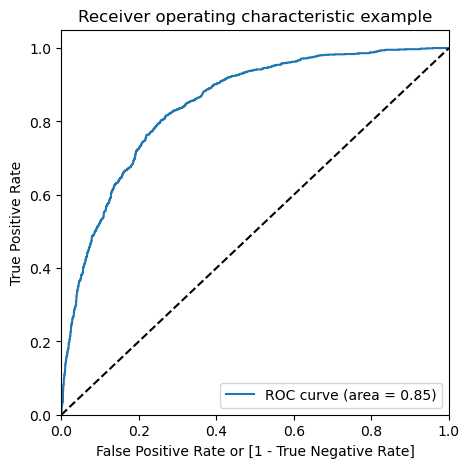

In [129]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [130]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167505,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.274338,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.534761,6498,1,1,1,1,1,1,1,0,0,0,0
3,1,0.545768,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.684379,2784,1,1,1,1,1,1,1,1,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.609305  0.941725  0.491609
0.2   0.2  0.719423  0.851593  0.672627
0.3   0.3  0.767371  0.773116  0.765337
0.4   0.4  0.793580  0.651904  0.843741
0.5   0.5  0.801910  0.526030  0.899587
0.6   0.6  0.801503  0.398601  0.944154
0.7   0.7  0.772653  0.182595  0.981568
0.8   0.8  0.745835  0.035742  0.997249
0.9   0.9  0.738521  0.000000  1.000000


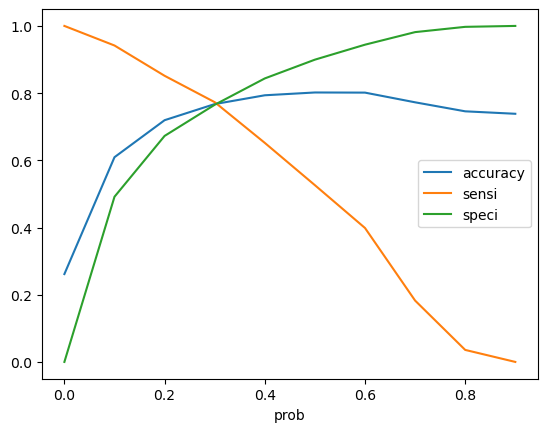

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167505,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.274338,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.534761,6498,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.545768,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.684379,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [134]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7673709874034945

In [135]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2782,  853],
       [ 292,  995]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7731157731157731

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.7653370013755159

In [139]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23466299862448417


In [140]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5384199134199135


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9050097592713078


## Precision and Recall

In [142]:
#Looking at the confusion matrix again

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3270,  365],
       [ 610,  677]], dtype=int64)

##### Precision
TP / TP + FP

In [144]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6497120921305183

##### Recall
TP / TP + FN

In [145]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.526029526029526

Using sklearn utilities for the same

In [146]:
from sklearn.metrics import precision_score, recall_score

In [147]:
?precision_score

In [148]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6497120921305183

In [149]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.526029526029526

### Precision and recall tradeoff

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

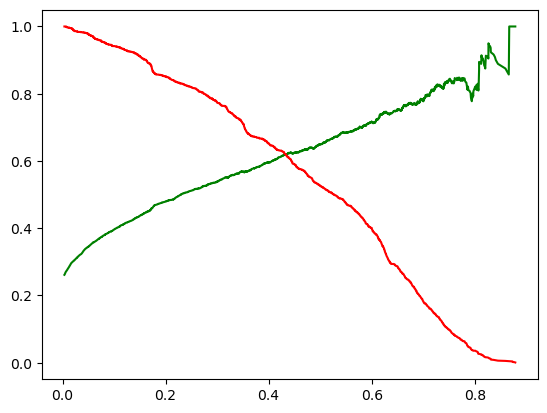

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [154]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [155]:
X_test = X_test[col]
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,-0.347623,0.499951,0,0,1,0,0,0,1
3730,0,0.999203,1.319685,0,0,1,0,1,1,1
1761,0,1.040015,-1.342374,0,1,0,1,1,0,0
2283,0,-1.286319,0.223935,0,0,1,0,0,0,0
1872,0,0.346196,-1.500335,0,1,0,1,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

942     0.480543
3730    0.284849
1761    0.008464
2283    0.615319
1872    0.011559
1970    0.652298
2532    0.279541
1616    0.007522
2485    0.543654
5914    0.147271
dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head
y_pred_1.head()

,0
942,0.480543
3730,0.284849
1761,0.008464
2283,0.615319
1872,0.011559


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.480543
1,1,3730,0.284849
2,0,1761,0.008464
3,1,2283,0.615319
4,0,1872,0.011559


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [167]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [168]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.480543
1,3730,1,0.284849
2,1761,0,0.008464
3,2283,1,0.615319
4,1872,0,0.011559


In [169]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [170]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.480543,1
1,3730,1,0.284849,0
2,1761,0,0.008464,0
3,2283,1,0.615319,1
4,1872,0,0.011559,0


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.776303317535545

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1284,  244],
       [ 228,  354]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6082474226804123

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.8403141361256544